# **Tutorial 3 Deep Learning**
*   RNN
*   LSTM
*   GRU



## Konsep Teori

**Multivariate**


Multivariate merujuk pada penggunaan lebih dari satu variabel dalam analisis atau model. Ini berguna untuk memahami hubungan dan prediksi dalam berbagai bidang seperti keuangan dan kesehatan. Dalam konteks prediksi harga saham, misalnya, menggunakan beberapa variabel seperti harga historis saham dan faktor ekonomi memungkinkan model yang lebih kompleks. Dengan pendekatan multivariate, kita dapat membangun model yang lebih realistis dan akurat karena mempertimbangkan sejumlah variabel yang berbeda.

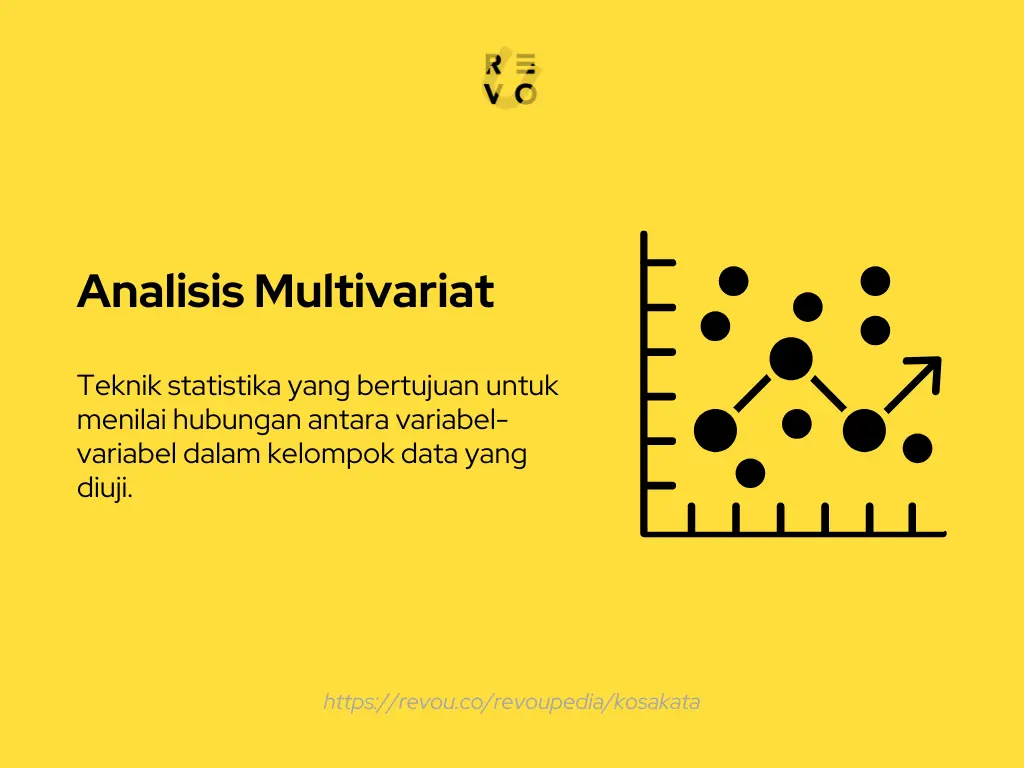

Analisis multivariate memiliki aplikasi yang luas dari keuangan hingga ilmu kesehatan dan pengelolaan rantai pasokan. Dalam keuangan, digunakan untuk memahami korelasi antara aset dan mengelola investasi. Di ilmu kesehatan, membantu penelitian epidemiologi untuk memahami penyebaran penyakit. Dalam rantai pasokan, memprediksi permintaan barang dengan mempertimbangkan variabel yang beragam. Ini memberikan wawasan mendalam dan mendukung pengambilan keputusan yang lebih baik di berbagai bidang.

**Deep Learning**

Deep learning adalah cabang dari pembelajaran mesin yang menggunakan jaringan saraf tiruan dengan banyak lapisan, meniru struktur hierarkis jaringan saraf manusia. Dalam deep learning, jaringan ini memproses informasi melalui serangkaian lapisan untuk mengekstraksi fitur secara bertingkat dari data masukan. Dengan perbaruan bobotnya selama proses belajar, jaringan ini bisa mempelajari representasi yang mendalam dari data, menjadi sangat berguna dalam bidang seperti pengenalan gambar, bahasa, dan lainnya.

RNN (Recurrent Neural Network), LSTM (Long Short-Term Memory), dan GRU (Gated Recurrent Unit) adalah tiga jenis arsitektur jaringan saraf tiruan yang umum digunakan dalam pemodelan urutan data seperti teks, waktu, atau urutan lainnya. Mereka mempertahankan memori atau informasi kontekstual dari urutan masukan sebelumnya saat memproses urutan data.


1.   RNN adalah arsitektur dasar yang terdiri dari neuron yang terhubung secara berulang, memungkinkan informasi untuk diungkapkan dan diproses dari urutan masukan sebelumnya ke yang berikutnya. Namun, RNN memiliki kendala dalam menangani masalah memori panjang karena kesulitan dalam mengingat informasi dari urutan masukan yang lebih lama.
2.   LSTM (Long Short-Term Memory) adalah modifikasi dari RNN yang didesain untuk mengatasi masalah hilangnya informasi jangka panjang. LSTM menggunakan struktur sel memori yang terdiri dari tiga gerbang (input, forget, dan output gate) serta sel memori sendiri, yang memungkinkannya untuk mengontrol aliran informasi dalam jaringan. Dengan gerbang ini, LSTM dapat mengingat informasi jangka panjang dan memutuskan kapan untuk melupakan atau menggunakan informasi tertentu.
1.   GRU (Gated Recurrent Unit) juga merupakan modifikasi dari RNN yang memiliki struktur yang lebih sederhana daripada LSTM. GRU menggabungkan unit yang bertanggung jawab atas kontrol memori dan unit yang mengatur aliran informasi dalam satu struktur, yaitu gerbang reset (reset gate) dan gerbang pembaruan (update gate). GRU menunjukkan kinerja yang baik dalam banyak tugas pemodelan urutan dengan kompleksitas yang lebih rendah daripada LSTM.

Perbedaannya terletak pada struktur dan kompleksitasnya: LSTM memiliki struktur yang lebih kompleks dengan tiga gerbang, sedangkan GRU memiliki struktur yang lebih sederhana dengan hanya dua gerbang. LSTM kadang-kadang cenderung memiliki kinerja yang lebih baik dalam menangani masalah memori jangka panjang, tetapi GRU sering kali lebih efisien dalam komputasi dan lebih cepat dalam proses pembelajaran. Pemilihan di antara keduanya sering tergantung pada kebutuhan spesifik dari suatu tugas atau data yang dihadapi.



## Import Library

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DOM_hourly.csv to DOM_hourly.csv
Saving testset.csv to testset.csv


## RNN

In [ ]:
data = pd.read_csv("DOM_hourly.csv", index_col='Datetime', parse_dates=['Datetime'])
data.head()

,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0


In [ ]:
data.isna().sum()

DOM_MW    0
dtype: int64

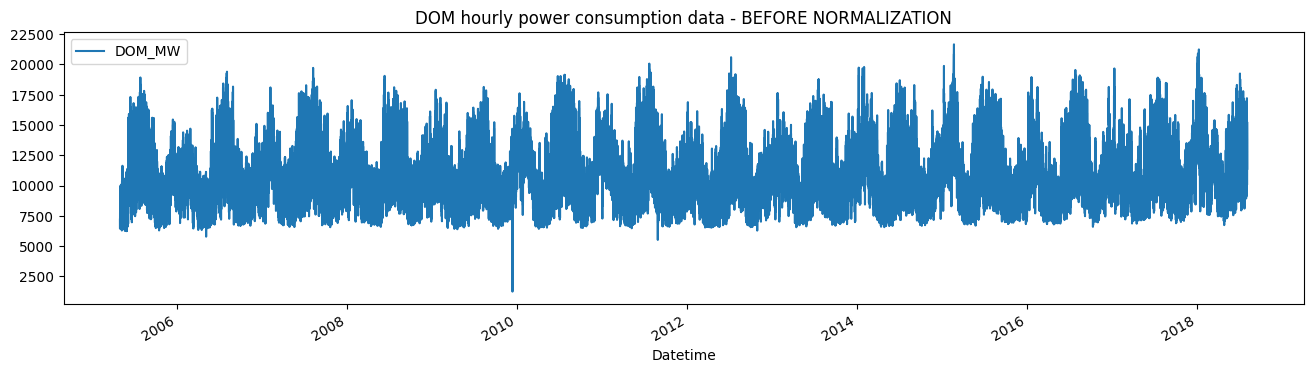

In [ ]:
data.plot(figsize=(16,4),legend=True)
plt.title('DOM hourly power consumption data - BEFORE NORMALIZATION')
plt.show()

In [ ]:
def normalize_fn(data):
    scaler_object = sklearn.preprocessing.MinMaxScaler()
    data['DOM_MW']=scaler_object.fit_transform(data['DOM_MW'].
    values.reshape(-1,1))
    return data

In [ ]:
data_norm = normalize_fn(data)
data_norm.head()

,DOM_MW
Datetime,
2005-12-31 01:00:00,0.398863
2005-12-31 02:00:00,0.383224
2005-12-31 03:00:00,0.379841
2005-12-31 04:00:00,0.381851
2005-12-31 05:00:00,0.386263


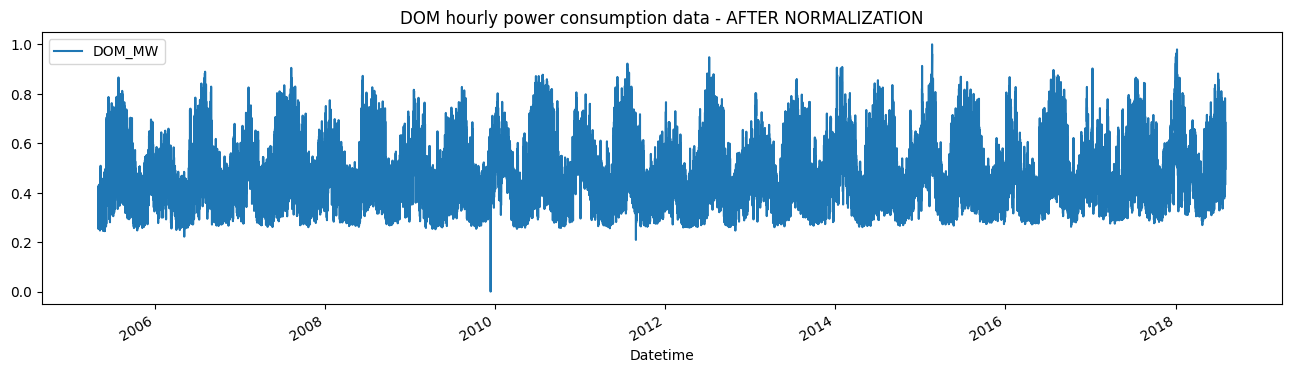

In [ ]:
data_norm.plot(figsize=(16,4),legend=True)
plt.title('DOM hourly power consumption data - AFTER NORMALIZATION')
plt.show()

In [ ]:
def data_prep(data, length):
    X = []
    y = []

    for i in range(length, len(data)):
        X.append(data.iloc[i - length: i, 0])
        y.append(data.iloc[i, 0])

    # train-test split

    # training contains first 110000 days and test contains the remaining 6189 days

    train_X = X[:110000]
    train_y = y[:110000]
    test_X = X[110000:]
    test_y = y[110000:]

    # converting to numpy array

    train_X = np.array(train_X)
    train_y = np.array(train_y)
    test_X = np.array(test_X)
    test_y = np.array(test_y)

    # reshaping data to required format to input to RNN,LSTM models

    train_X = np.reshape(train_X, (110000, length, 1))
    test_X = np.reshape(test_X, (test_X.shape[0], length, 1))
    return [train_X, train_y, test_X, test_y]



```
Urutan (X):
[10, 20, 30]
[20, 30, 40]
[30, 40, 50]
[40, 50, 60]
[50, 60, 70]
[60, 70, 80]
[70, 80, 90]
[80, 90, 100]

Target (y):
[40, 50, 60, 70, 80, 90, 100]

```




In [ ]:
sequence_length = 20
train_X, train_y, test_X, test_y = data_prep(data,sequence_length)
print('train_X.shape = ',train_X.shape)
print('train_y.shape = ', train_y.shape)
print('test_X.shape = ', test_X.shape)
print('test_y.shape = ',test_y.shape)

train_X.shape =  (110000, 20, 1)
train_y.shape =  (110000,)
test_X.shape =  (6169, 20, 1)
test_y.shape =  (6169,)


In [ ]:
model = Sequential()
model.add(SimpleRNN(60,activation="tanh",return_sequences=True, input_shape=(train_X.shape[1],1))) # Unit = 12,24,36,48 (Bebas)
model.add(Dropout(0.15))
model.add(SimpleRNN(40,activation="tanh",return_sequences=True)) # activation = Relu, sigmoid, tanh
model.add(Dropout(0.15))
model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
model.add(Dropout(0.15))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20, 60)            3720      
                                                                 
 dropout (Dropout)           (None, 20, 60)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 40)            4040      
                                                                 
 dropout_1 (Dropout)         (None, 20, 40)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 1)                 4

In [ ]:
model.compile(optimizer="adam",loss="MSE") # optimizer = adam, huber, spatial_crossentrophy # loss = accuracy, mse
model.fit(train_X, train_y, epochs=10, batch_size=1000)

Epoch 1/10
110/110 [==============================] - 15s 116ms/step - loss: 0.1738
Epoch 2/10
110/110 [==============================] - 13s 116ms/step - loss: 0.0325
Epoch 3/10
110/110 [==============================] - 13s 116ms/step - loss: 0.0157
Epoch 4/10
110/110 [==============================] - 12s 109ms/step - loss: 0.0106
Epoch 5/10
110/110 [==============================] - 12s 106ms/step - loss: 0.0080
Epoch 6/10
110/110 [==============================] - 13s 116ms/step - loss: 0.0064
Epoch 7/10
110/110 [==============================] - 13s 116ms/step - loss: 0.0054
Epoch 8/10
110/110 [==============================] - 13s 115ms/step - loss: 0.0046
Epoch 9/10
110/110 [==============================] - 13s 116ms/step - loss: 0.0040
Epoch 10/10
110/110 [==============================] - 17s 156ms/step - loss: 0.0036


In [ ]:
predictions = model.predict(test_X)
score = r2_score(test_y,predictions)
print("R-Squared Score of RNN model",score)

193/193 [==============================] - 2s 7ms/step
R-Squared Score of RNN model 0.9428938284164241


In [ ]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual power consumption data')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()

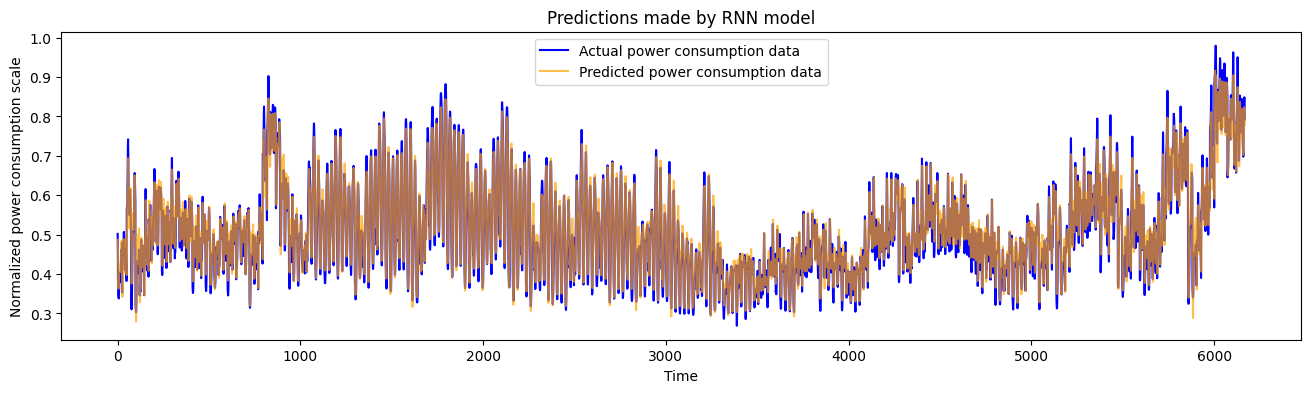

In [ ]:
plotting_actual_vs_pred(test_y, predictions, "Predictions made by RNN model")

## LSTM

In [ ]:
data = pd.read_csv('testset.csv')

# remove spaces on the column
data.columns = data.columns.str.lstrip()
data.columns = data.columns.str.rstrip()

# print out sample dataset
print(len(data))
data.head()

100990


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1   _conds        100918 non-null  object 
 2   _dewptm       100369 non-null  float64
 3   _fog          100990 non-null  int64  
 4   _hail         100990 non-null  int64  
 5   _heatindexm   29155 non-null   float64
 6   _hum          100233 non-null  float64
 7   _precipm      0 non-null       float64
 8   _pressurem    100758 non-null  float64
 9   _rain         100990 non-null  int64  
 10  _snow         100990 non-null  int64  
 11  _tempm        100317 non-null  float64
 12  _thunder      100990 non-null  int64  
 13  _tornado      100990 non-null  int64  
 14  _vism         96562 non-null   float64
 15  _wdird        86235 non-null   float64
 16  _wdire        86235 non-null   object 
 17  _wgustm       1072 non-null    float64
 18  _win

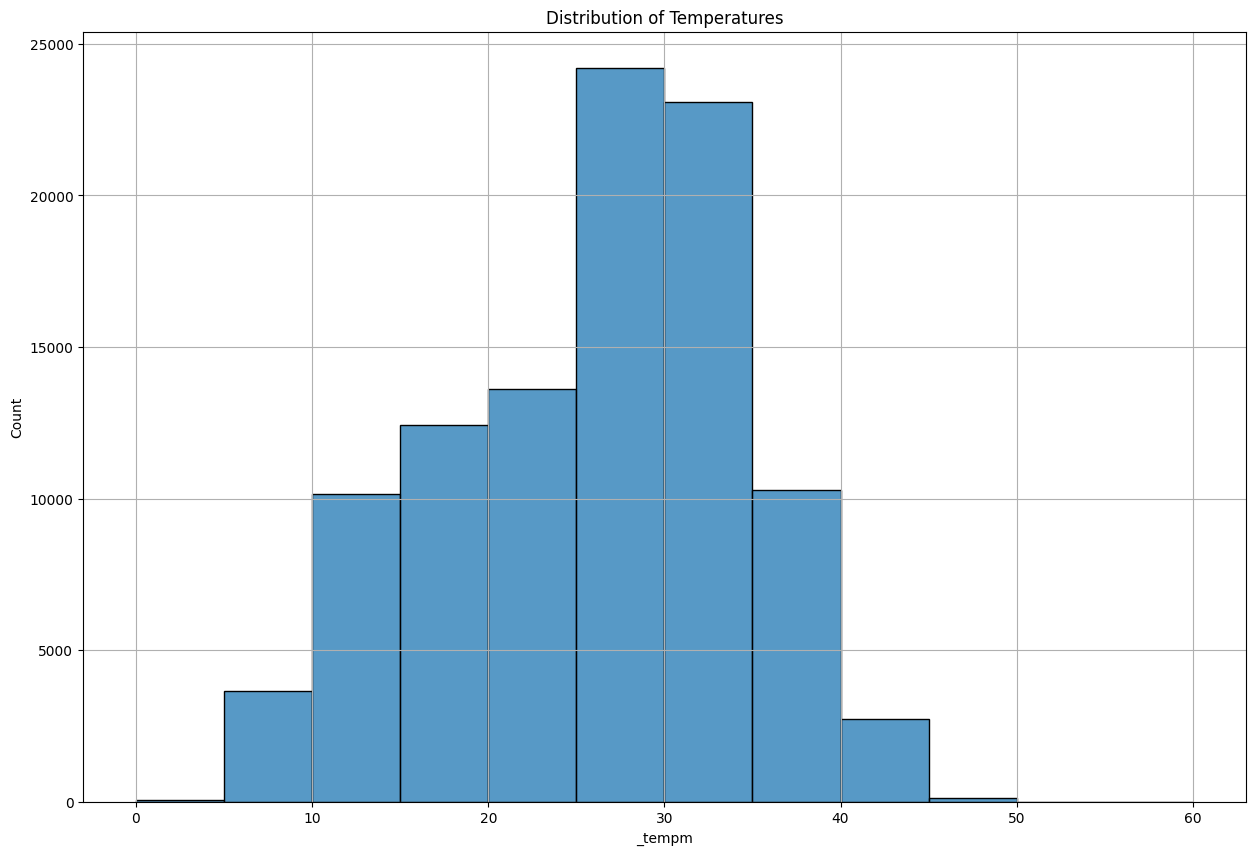

In [ ]:
# plot to see the temperature varience
plt.figure(figsize=(15, 10))
sns.histplot(data['_tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

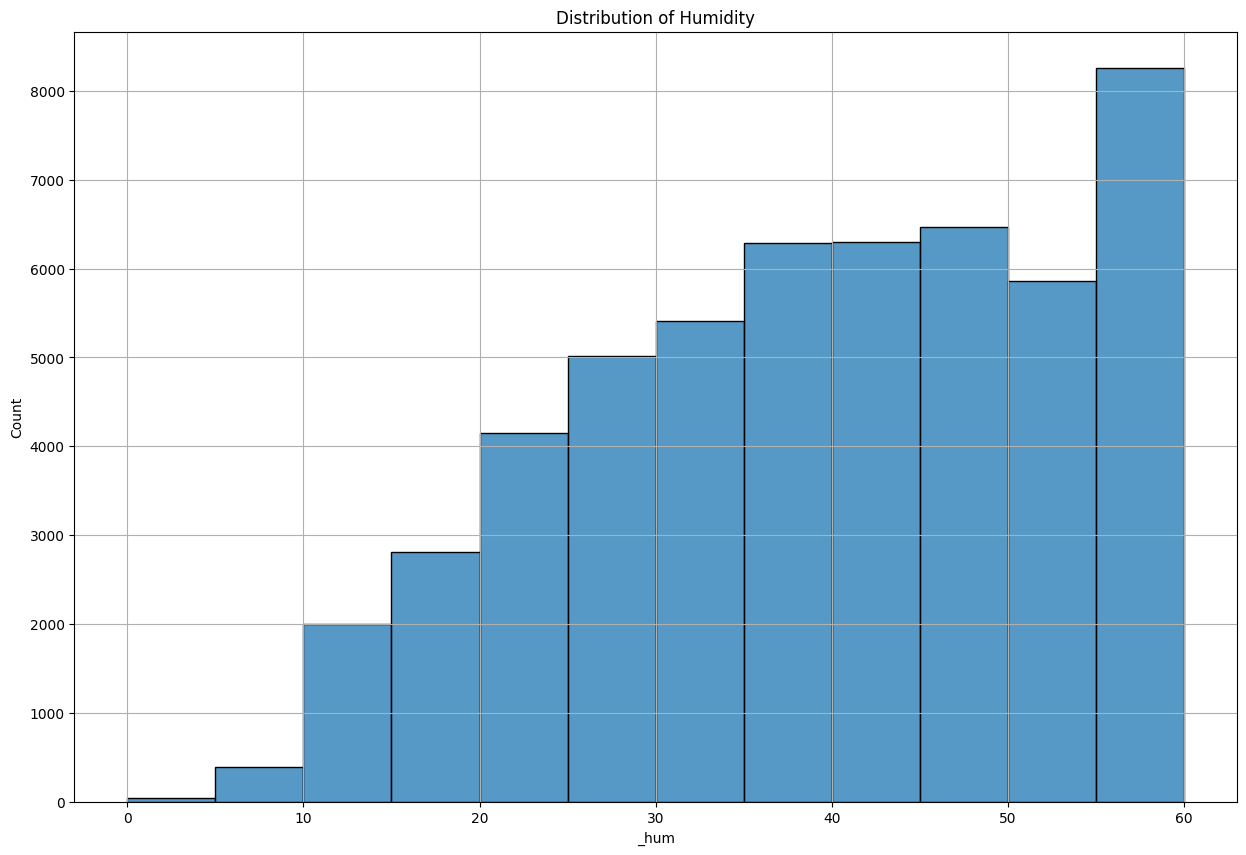

In [ ]:
# plot to see the temperature varience
plt.figure(figsize=(15, 10))
sns.histplot(data['_hum'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Humidity")
plt.grid()
plt.show()

In [ ]:
# set data index as datetime column
data.index = pd.to_datetime(data.datetime_utc)

# filter the columns by only the required_columns
required_cols = ['_tempm', '_hum']
data = data[required_cols]
data.head()

,_tempm,_hum
datetime_utc,,
1996-11-01 11:00:00,30.0,27.0
1996-11-01 12:00:00,28.0,32.0
1996-11-01 13:00:00,24.0,44.0
1996-11-01 14:00:00,24.0,41.0
1996-11-01 16:00:00,23.0,47.0


In [ ]:
# check number of nan values in dataframe
data.isna().sum()

_tempm    673
_hum      757
dtype: int64

In [ ]:
# fill the nan values by upper row value
data = data.fillna(method='ffill')

In [ ]:
# check number of nan values in dataframe
data.isna().sum()

_tempm    0
_hum      0
dtype: int64

In [ ]:
data_final = data.resample('D').mean()
data_final.head()

,_tempm,_hum
datetime_utc,,
1996-11-01,22.333333,52.916667
1996-11-02,22.916667,48.625000
1996-11-03,21.791667,55.958333
1996-11-04,22.722222,48.055556
1996-11-05,27.800000,29.400000


In [ ]:
data_final.isna().sum()

_tempm    141
_hum      141
dtype: int64

In [ ]:
data_final = data_final.fillna(method='ffill')
data_final.isna().sum()

_tempm    0
_hum      0
dtype: int64

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_final)

# Function to create time series sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

# Define sequence length and split data into sequences
sequence_length = 12  # You can adjust this based on your preference
X = create_sequences(data_scaled, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
train, test = X[:train_size], X[train_size:]

# Split the sequences into input (X) and output (y)
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

print("Train X shape:", X_train.shape)
print("Train Y shape:", y_train.shape)
print("Test X shape:", X_test.shape)
print("Test Y shape:", y_test.shape)

Train X shape: (5974, 11, 2)
Train Y shape: (5974, 2)
Test X shape: (1494, 11, 2)
Test Y shape: (1494, 2)


In [ ]:
# Build the LSTM model
model = Sequential()

# First LSTM layer
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Second LSTM layer
model.add(LSTM(50, activation='relu'))

# Output layer
model.add(Dense(2))  # Assuming you want to predict 2 features (_tempm and _hum)

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 11, 50)            10600     
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
75/75 [==============================] - 4s 22ms/step - loss: 0.0750 - val_loss: 0.0099
Epoch 2/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0106 - val_loss: 0.0087
Epoch 3/100
75/75 [==============================] - 2s 29ms/step - loss: 0.0097 - val_loss: 0.0084
Epoch 4/100
75/75 [==============================] - 2s 27ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 5/100
75/75 [==============================] - 1s 20ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 6/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 7/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0073 - val_loss: 0.0063
Epoch 8/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 9/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 10/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0061 - val_loss: 0.0064

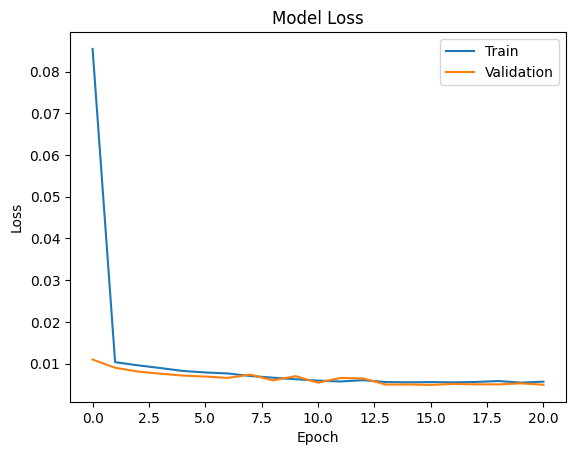

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions to original scale
y_pred = scaler.inverse_transform(y_pred_scaled)

# Inverse transform the original test set to compare with predictions
y_test = scaler.inverse_transform(y_test)

47/47 [==============================] - 0s 5ms/step


In [ ]:
# Calculate RMSE, MAPE, MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test, y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")

Root Mean Squared Error (RMSE): 5.594570188847162
Mean Squared Error (MSE): 31.299215597937366


In [ ]:
y_test

array([[31.85714286, 64.42857143],
       [33.        , 59.71428571],
       [33.14285714, 63.        ],
       ...,
       [30.9375    , 73.9375    ],
       [32.875     , 62.1875    ],
       [33.125     , 60.8125    ]])

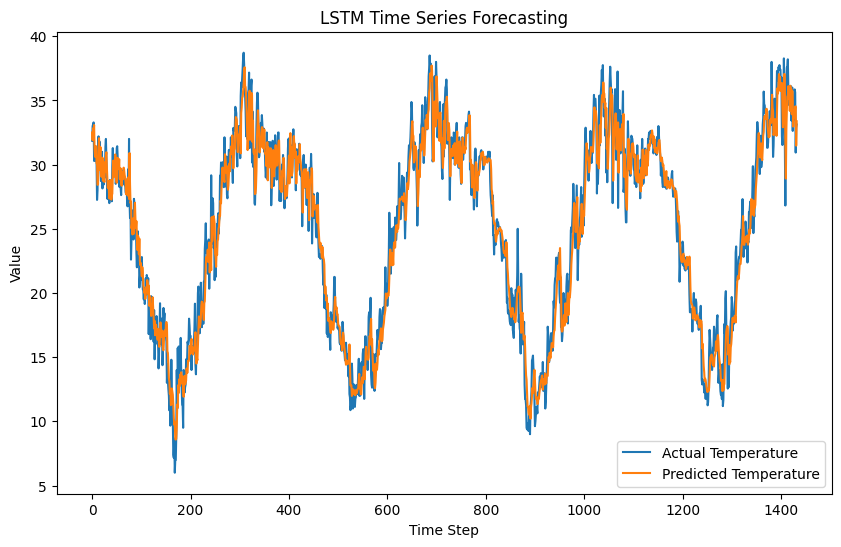

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(10, 6))

plt.plot(y_test[:, 0], label='Actual Temperature')
plt.plot(y_pred[:, 0], label='Predicted Temperature')

plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

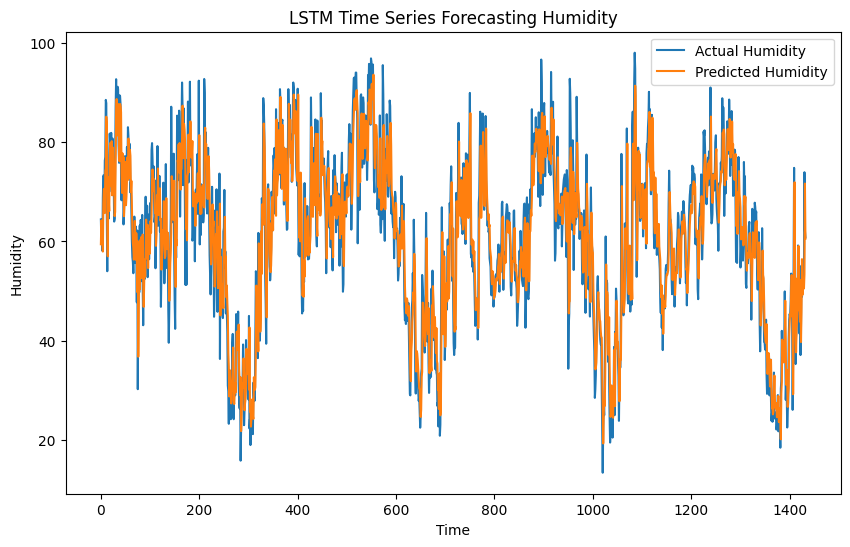

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(y_test[:, 1], label='Actual Humidity')
plt.plot(y_pred[:, 1], label='Predicted Humidity')

plt.title('LSTM Time Series Forecasting Humidity')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.show()

## GRU

In [ ]:
data_gru = pd.read_csv('testset.csv')

# remove spaces on the column
data_gru .columns = data_gru.columns.str.lstrip()
data_gru .columns = data_gru.columns.str.rstrip()

# print out sample dataset
print(len(data_gru ))
data_gru .head()

100990


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


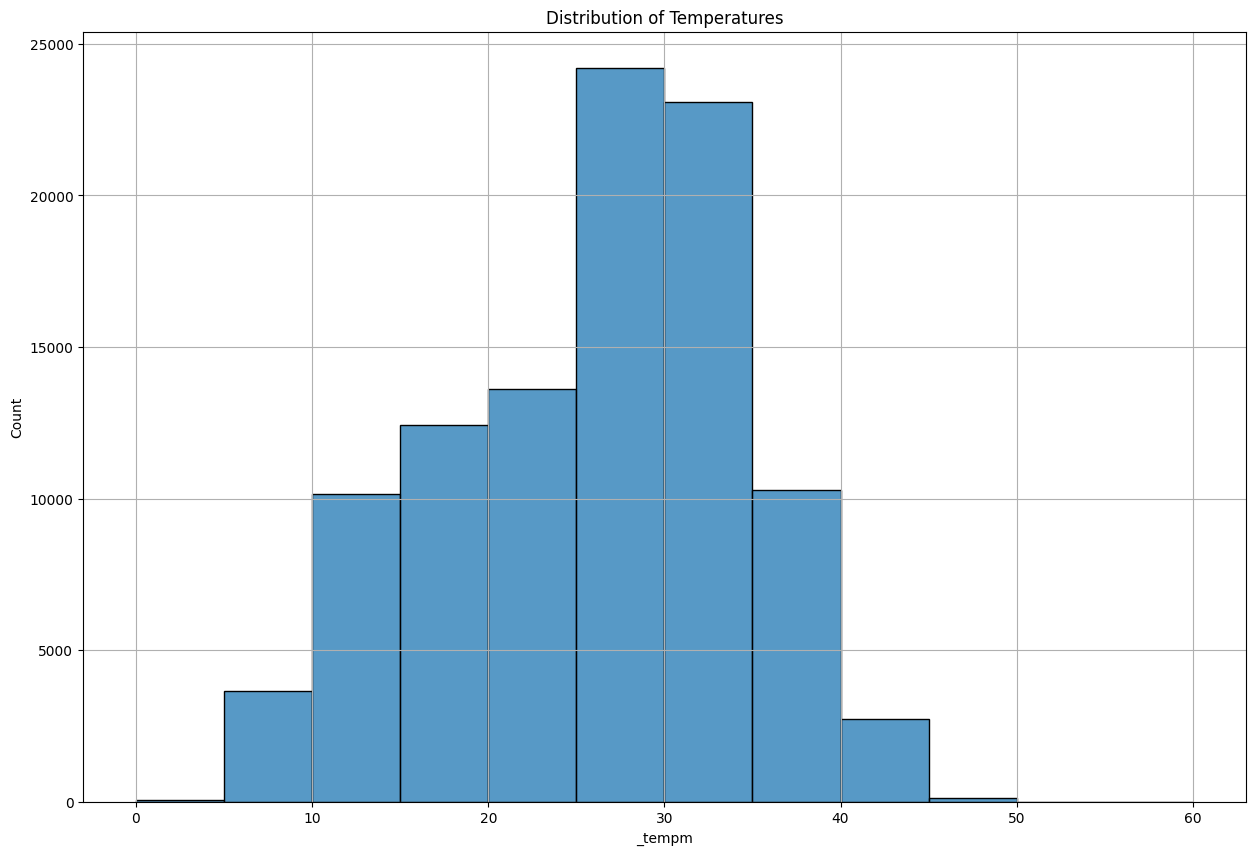

In [ ]:
# plot to see the temperature varience
plt.figure(figsize=(15, 10))
sns.histplot(data_gru['_tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [ ]:
# set data index as datetime column
data_gru.index = pd.to_datetime(data_gru.datetime_utc)

# filter the columns by only the required_columns
required_cols = ['_dewptm', '_fog', '_hail', '_hum', '_rain', '_snow', '_tempm', '_thunder', '_tornado']
data_gru = data_gru[required_cols]
data_gru.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [ ]:
# check number of nan values in dataframe
data_gru.isna().sum()

_dewptm     621
_fog          0
_hail         0
_hum        757
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [ ]:
# fill the nan values by upper row value
data_gru = data_gru.fillna(method='ffill')

In [ ]:
# check number of nan values in dataframe
data_gru.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [ ]:
data_gru_final = data_gru.resample('D').mean()
data_gru_final.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [ ]:
data_gru_final.isna().sum()

_dewptm     141
_fog        141
_hail       141
_hum        141
_rain       141
_snow       141
_tempm      141
_thunder    141
_tornado    141
dtype: int64

In [ ]:
data_gru_final = data_gru_final.fillna(method='ffill')
data_gru_final.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_gru_final)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(data_gru_final.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][1]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (5976, 10, 9)
Train Y shape: (5976,)
Test X shape: (1494, 10, 9)
Test Y shape: (1494,)


In [ ]:
# Create the GRU model
model = Sequential()

# Add GRU layers with dropout
model.add(GRU(units=256, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=128, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=64, return_sequences=False))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 256)           205056    
                                                                 
 dropout_3 (Dropout)         (None, 10, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 10, 128)           148224    
                                                                 
 dropout_4 (Dropout)         (None, 10, 128)           0         
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 390593 (1.49 MB)
Trainable params: 39059

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
75/75 [==============================] - 15s 123ms/step - loss: 0.0123 - val_loss: 0.0180
Epoch 2/100
75/75 [==============================] - 7s 96ms/step - loss: 0.0101 - val_loss: 0.0155
Epoch 3/100
75/75 [==============================] - 7s 99ms/step - loss: 0.0093 - val_loss: 0.0151
Epoch 4/100
75/75 [==============================] - 7s 94ms/step - loss: 0.0092 - val_loss: 0.0145
Epoch 5/100
75/75 [==============================] - 7s 99ms/step - loss: 0.0090 - val_loss: 0.0146
Epoch 6/100
75/75 [==============================] - 7s 92ms/step - loss: 0.0095 - val_loss: 0.0145
Epoch 7/100
75/75 [==============================] - 8s 102ms/step - loss: 0.0088 - val_loss: 0.0175
Epoch 8/100
75/75 [==============================] - 7s 91ms/step - loss: 0.0090 - val_loss: 0.0153
Epoch 9/100
75/75 [==============================] - 8s 104ms/step - loss: 0.0093 - val_loss: 0.0160


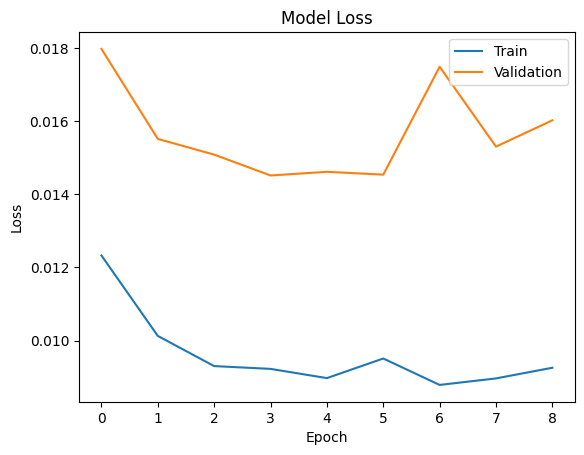

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict temperatures using the trained model
predictions = model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

47/47 [==============================] - 3s 27ms/step
Mean Absolute Error (MAE): 0.05826916112944312
Mean Squared Error (MSE): 0.012634618740264447
Root Mean Squared Error (RMSE): 0.11240381995405871


In [ ]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

# predicted values
prediction = model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

47/47 [==============================] - 1s 16ms/step


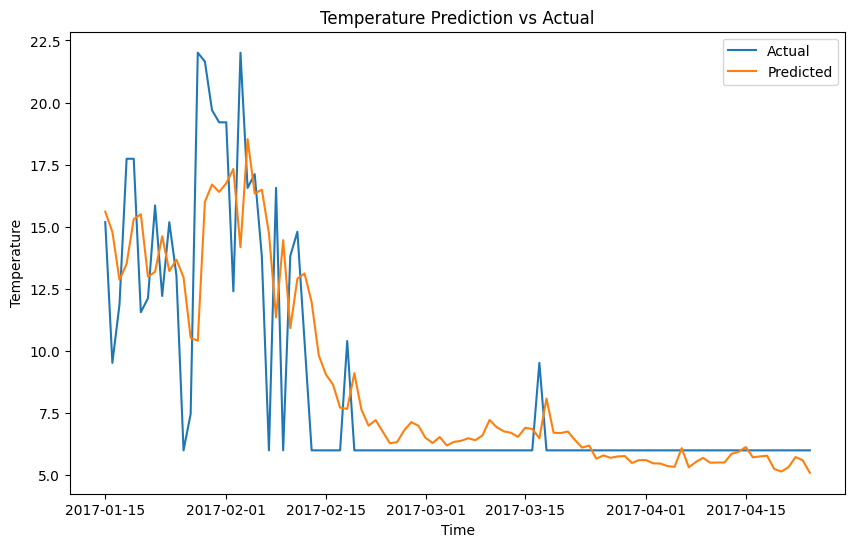

In [ ]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(data_gru_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(data_gru_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()
